In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data_banknote_authentication.txt',sep=',',names=['variance','skewness','curtosis','entropy','class'])

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
df.isnull().sum()             # zero null values

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

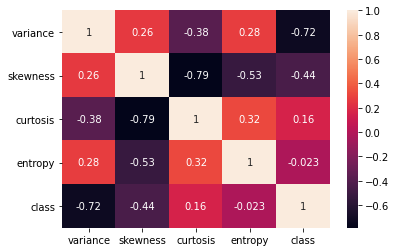

In [8]:
correlation = df.corr() ## Pearson Correlation
sns.heatmap(correlation,annot=True)

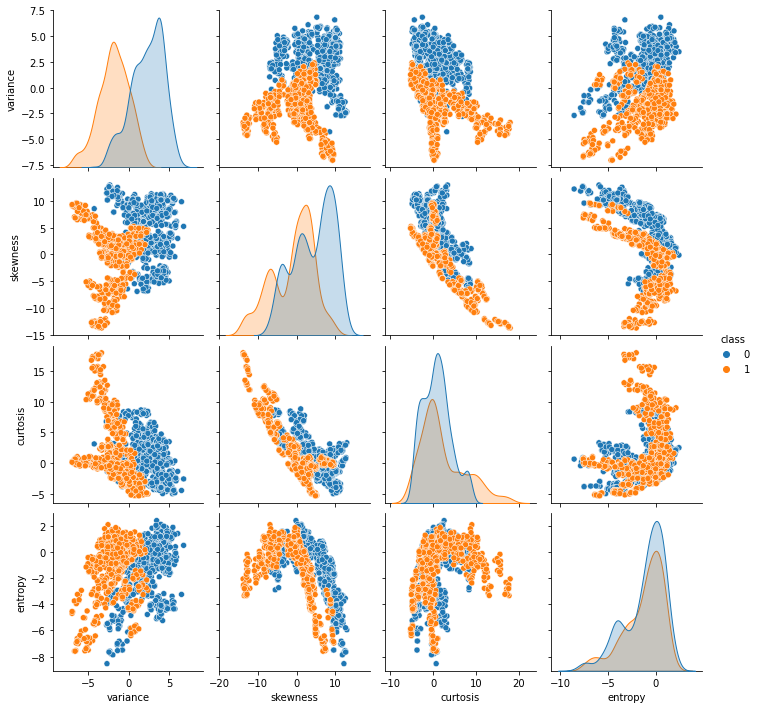

In [9]:
sns.pairplot(df,hue='class') ##Pairplot - Overview of the data and can detect outliers

c:\users\kesha\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='variance', ylabel='Density'>

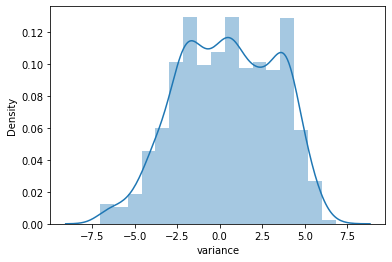

In [10]:
sns.distplot(df['variance'])

c:\users\kesha\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\kesha\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\kesha\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

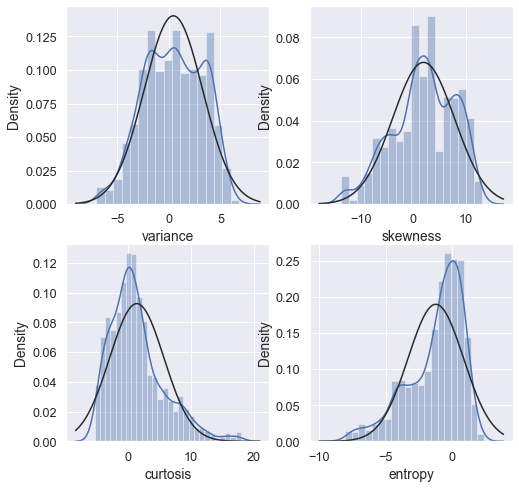

In [11]:
from scipy.stats import norm
columns=['variance','skewness','curtosis','entropy']
sns.set(font_scale=1.15)
f, axes = plt.subplots(2,2,figsize=(8,8))
for id,col in enumerate(columns):
    row = 0
    if id >=2:
        row = 1
    id = id%2
    sns.distplot(df[col], ax=axes[row,id],label = 'col',fit=norm)
    axes[row,id].set_xlabel(col)


plt.show()

In [12]:
# from sklearn.preprocessing import normalize
# df=normalize(df)

In [13]:
# columns=['variance','skewness','curtosis','entropy','class']

# df=pd.DataFrame(df,columns=columns)

In [14]:
# columns=['variance','skewness','curtosis','entropy']
# for col for columns:
#     df[col]=np.log(df[col])

In [15]:
# from scipy.stats import norm
# columns=['variance','skewness','curtosis','entropy']
# sns.set(font_scale=1.15)
# f, axes = plt.subplots(2,2,figsize=(8,8))
# for id,col in enumerate(columns):
#     row = 0
#     if id >=2:
#         row = 1
#     id = id%2
#     sns.distplot(df[col], ax=axes[row,id],label = 'col',fit=norm)
#     axes[row,id].set_xlabel(col)


# plt.show()

c:\users\kesha\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

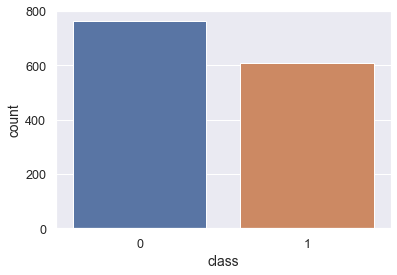

In [16]:
sns.countplot(df['class'])

In [17]:
X=df.drop(['class'],axis=1)
X=df.drop(['class'],axis=1)
y=df['class']

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X) ### Standardize features by removing the mean and scaling to unit variance

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) ### SPLIT dataset - Training and Testing sets

### LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [21]:
print("Accuracy with Logistic Regression is {} %".format(round(accuracy_score(y_test,y_pred)*100,2)))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

Accuracy with Logistic Regression is 97.96 %
Confusion Matrix
[[186   5]
 [  2 150]]


In [22]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       191
           1       0.97      0.99      0.98       152

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



### SUPPORT VECTOR MACHINE

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svm = SVC(gamma='auto')
cv_scores = cross_val_score(svm, X, y, cv=10)
cv_scores.mean()                                                      #### 10 fold cross-validation 

1.0

In [24]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [25]:
print("Accuracy with Support Vector Classifier is {} %".format(round(accuracy_score(y_test,y_pred)*100,2)))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

Accuracy with Support Vector Classifier is 100.0 %
Confusion Matrix
[[191   0]
 [  0 152]]


In [26]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       152

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343

